# Chapter 8, Example 4b

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pylab
import os

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

creating the figures folder


In [2]:
# Hyperparameters
n_in = 2
n_hidden = 10
n_out = 1
n_steps = 16
n_seqs = 64
n_iters = 10000
lr = 0.001
seed = 10

np.random.seed(seed)
torch.manual_seed(seed)

# Generating Training Data

In [3]:
# Generate training data
x_train = np.random.rand(n_seqs, n_steps, n_in)
y_train = np.zeros([n_seqs, n_steps, n_out])
y_train[:, 7:, 0] = 5 * x_train[:, 6:-1, 0] * x_train[:, 5:-2, 1] - 2 * x_train[:, :-7, 0] + 3.5 * x_train[:, 2:-5, 1]**2
y_train += 0.1 * np.random.randn(n_seqs, n_steps, n_out)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# SeriesPredictor Model





In [4]:
class SeriesPredictor(nn.Module):
    def __init__(self, input_dim, seq_size, num_steps, hidden_dim=10, cell_type='lstm'):
        super(SeriesPredictor, self).__init__()

        self.num_steps = num_steps

        if cell_type == 'rnn':
            self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        elif cell_type == 'gru':
            self.rnn = nn.GRU(input_dim, hidden_dim, batch_first=True)
        elif cell_type == 'lstm':
            self.rnn = nn.LSTM(input_dim, hidden_dim, batch_first=True)

        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out

In [5]:
def train_rnn(cell_type):
    predictor = SeriesPredictor(
        input_dim=n_in,
        seq_size=n_seqs,
        num_steps=n_steps,
        hidden_dim=n_hidden,
        cell_type=cell_type)

    optimizer = optim.Adam(predictor.parameters(), lr=lr)
    criterion = nn.MSELoss()

    losses = []
    for i in range(n_iters):
        optimizer.zero_grad()
        outputs = predictor(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if i % 100 == 0:
            print('iter:%d, cost: %g' % (i, losses[i]))
    return losses

iter:0, cost: 3.43789
iter:100, cost: 1.94717
iter:200, cost: 1.68939
iter:300, cost: 1.58088
iter:400, cost: 1.5764
iter:500, cost: 1.57327
iter:600, cost: 1.56792
iter:700, cost: 1.57056
iter:800, cost: 1.56383
iter:900, cost: 1.55746
iter:1000, cost: 1.55131
iter:1100, cost: 1.54763
iter:1200, cost: 1.52387
iter:1300, cost: 1.49688
iter:1400, cost: 1.47283
iter:1500, cost: 1.45193
iter:1600, cost: 1.42877
iter:1700, cost: 1.39152
iter:1800, cost: 1.33439
iter:1900, cost: 1.27185
iter:2000, cost: 1.21646
iter:2100, cost: 1.17136
iter:2200, cost: 1.12653
iter:2300, cost: 1.08965
iter:2400, cost: 1.06435
iter:2500, cost: 1.04583
iter:2600, cost: 1.02988
iter:2700, cost: 1.01361
iter:2800, cost: 0.99451
iter:2900, cost: 0.968723
iter:3000, cost: 0.927423
iter:3100, cost: 0.841201
iter:3200, cost: 0.667728
iter:3300, cost: 0.597969
iter:3400, cost: 0.566975
iter:3500, cost: 0.547574
iter:3600, cost: 0.532787
iter:3700, cost: 0.52075
iter:3800, cost: 0.510628
iter:3900, cost: 0.5017
iter:

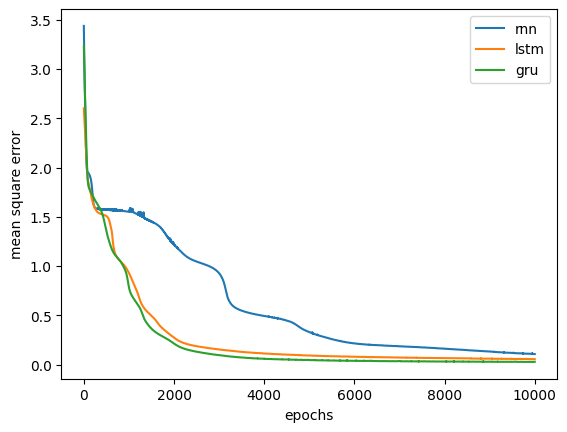

In [6]:
pylab.figure()
loss = train_rnn('rnn')
pylab.plot(range(n_iters), loss, label='rnn')

loss = train_rnn('lstm')
pylab.plot(range(n_iters), loss, label='lstm')

loss = train_rnn('gru')
pylab.plot(range(n_iters), loss, label='gru')

pylab.xlabel('epochs')
pylab.ylabel('mean square error')
pylab.legend()

pylab.savefig('./figures/9.1b_1.png')

pylab.show()